# Корреляционный анализ

In [1]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !wget -q -O requirements.txt https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/seminars/sem5/requirements.txt
    !pip install -qU -r requirements.txt

     |████████████████████████████████| 12.9 MB 3.8 MB/s 
     |████████████████████████████████| 38.1 MB 11.6 MB/s 
     |████████████████████████████████| 9.8 MB 33.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
mizani 0.6.0 requires matplotlib>=3.1.1, but you have matplotlib 3.0.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Библиотеки

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as st
import seaborn as sns

import statsmodels.api as sm

## Warmup

### Задача

Рассмотрим задачу нахождения корреляции Пирсона для двух случайных величин:

$X_1 \sim \mathcal{N}(0,1), \qquad X_2 = X_1 + \alpha\varepsilon, \quad \varepsilon \sim\mathcal{N}(0,1)$

Какова их корреляция?

### Данные

In [9]:
n = 10

alpha = 0.5
mean1 = mean2 = 0
disp1 =  1
disp2 =  1 + alpha**2
corr = 1.0/np.sqrt(disp2)

print(corr, disp2)

0.8944271909999159 1.25


### Проверка гипотезы о независимости

In [10]:
noises = np.array([0.1] + np.arange(0.5, 10.0, 0.5).tolist())

for noise in noises:    
    results_t = []
    results_z = []
    ts = []
    zs = []
    corr = 1.0/np.sqrt(1+noise**2)
    for _ in range(1000):
        data1 = np.random.randn(n)
        data2 = data1 + noise*np.random.randn(n)
        
        pearson = st.pearsonr(data1, data2)[0]
        if pearson == 1.:
            pearson = 0.99999
        
        T = (pearson - corr) * np.sqrt(n-2)/(np.sqrt(1-pearson**2))
        t_pval = 2 *(1 - st.distributions.t(n-2).cdf(abs(T)))

        Z = (np.arctanh(pearson) - np.arctanh(corr)*np.sqrt(n-3))
        z_pval = 2*(1 - st.distributions.norm.cdf(abs(Z)))

        t_res = t_pval>=0.05
        z_res = z_pval>=0.05

        ts.append(t_pval)
        zs.append(z_pval)

        results_t.append(t_res)
        results_z.append(z_res)
        
    print(noise, ':', corr, np.mean(results_t), np.mean(results_z))

0.1 : 0.9950371902099893 1.0 0.0
0.5 : 0.8944271909999159 0.999 0.162
1.0 : 0.7071067811865475 0.99 0.937
1.5 : 0.5547001962252291 0.972 0.995
2.0 : 0.4472135954999579 0.97 0.999
2.5 : 0.3713906763541037 0.958 0.999
3.0 : 0.31622776601683794 0.954 1.0
3.5 : 0.27472112789737807 0.966 1.0
4.0 : 0.24253562503633297 0.964 0.999
4.5 : 0.21693045781865616 0.955 1.0
5.0 : 0.19611613513818404 0.949 1.0
5.5 : 0.17888543819998318 0.959 1.0
6.0 : 0.1643989873053573 0.949 1.0
6.5 : 0.1520571842539411 0.958 1.0
7.0 : 0.1414213562373095 0.949 1.0
7.5 : 0.13216372009101796 0.947 1.0
8.0 : 0.12403473458920847 0.959 1.0
8.5 : 0.1168412475673972 0.959 1.0
9.0 : 0.11043152607484653 0.942 1.0
9.5 : 0.10468478451804275 0.952 1.0


### Добавление выброса

In [11]:
n = 100000
data1 = np.random.randn(n)
data2 = data1 + 0.2*np.random.randn(n)
mean1 = mean2 = 0
disp1 = 1
disp2 = 1+1**2
corr = 1.0/np.sqrt(disp2)
corr

0.7071067811865475

In [12]:
data1_new = data1.copy()
data2_new = data2.copy()
data1_new[0] += 9999

In [13]:
st.pearsonr(data1, data2)[0], st.pearsonr(data1_new, data2_new)[0]

(0.9807353562362009, 0.0349699930479387)

In [14]:
st.spearmanr(data1, data2)[0], st.spearmanr(data1_new, data2_new)[0]

(0.9788737015344996, 0.9788731790139275)

In [15]:
st.kendalltau(data1, data2)[0], st.kendalltau(data1_new, data2_new)[0]

(0.8748948017480177, 0.8748920329203294)

### Корреляция рангов

In [16]:
data = np.array([6, 1, 5, 4, 3, 2])
st.rankdata(data)

array([6., 1., 5., 4., 3., 2.])

In [17]:
np.argsort(np.argsort(data)) + 1

array([6, 1, 5, 4, 3, 2])

In [18]:
ranks1 = st.rankdata(data1)
ranks2 = st.rankdata(data2)

st.pearsonr(ranks1, ranks2)

(0.9788737015344993, 0.0)

## Успеваемость первокурсников

Для 600 первокурсников известны показатели успеваемости по четырём предметам и результаты трёх психологических тестов. Как связаны эти два набора переменных?



In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/seminars/sem5/data/mmreg.csv',  sep=',')

In [20]:
data.head()

,locus_of_control,self_concept,motivation,read,write,math,science
0,-0.84,-0.24,1.00,54.8,64.5,44.5,52.6
1,-0.38,-0.47,0.67,62.7,43.7,44.7,52.6
2,0.89,0.59,0.67,60.6,56.7,70.5,58.0
3,0.71,0.28,0.67,62.7,56.7,54.7,58.0
4,-0.64,0.03,1.00,41.6,46.3,38.4,36.3


In [21]:
psych = data.loc[:, data.columns[:3]]
psych.head()

,locus_of_control,self_concept,motivation
0,-0.84,-0.24,1.00
1,-0.38,-0.47,0.67
2,0.89,0.59,0.67
3,0.71,0.28,0.67
4,-0.64,0.03,1.00


In [22]:
acad = data.loc[:, data.columns[3:]]
acad.head()

,read,write,math,science
0,54.8,64.5,44.5,52.6
1,62.7,43.7,44.7,52.6
2,60.6,56.7,70.5,58.0
3,62.7,56.7,54.7,58.0
4,41.6,46.3,38.4,36.3


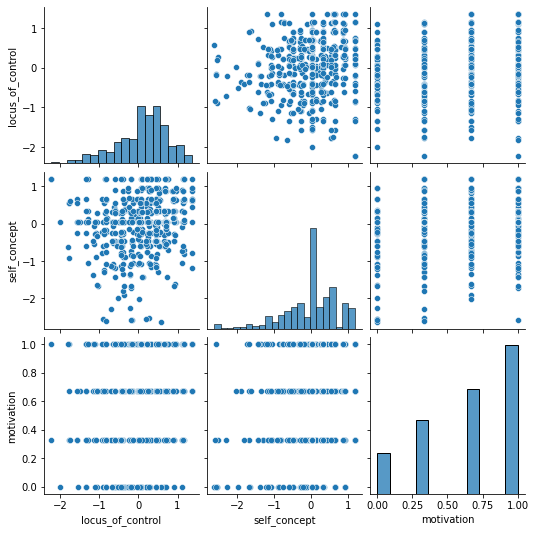

In [23]:
_ = sns.pairplot(psych)

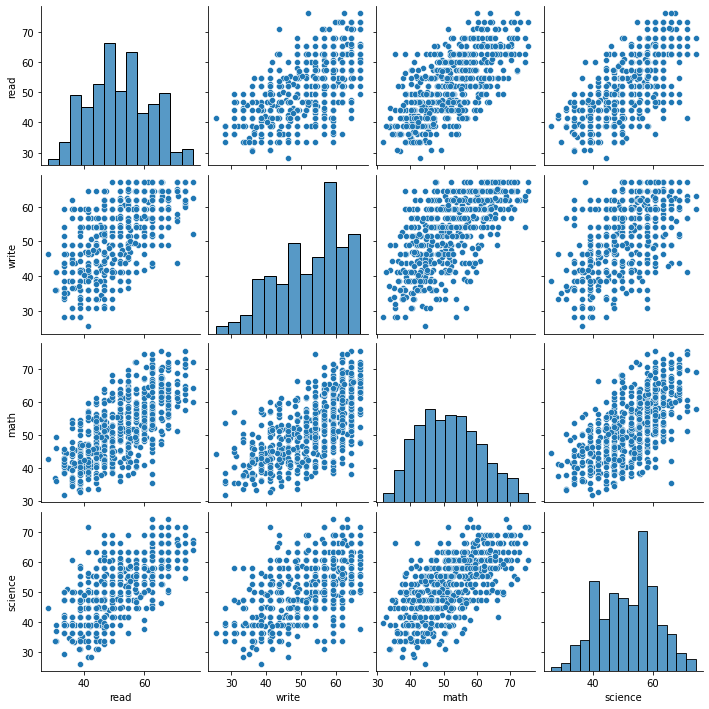

In [24]:
_ = sns.pairplot(acad)

### Попарные корреляции Пирсона:

In [25]:
np.corrcoef(acad.values.T)

array([[1.        , 0.62859089, 0.67927568, 0.69069291],
       [0.62859089, 1.        , 0.6326664 , 0.56914983],
       [0.67927568, 0.6326664 , 1.        , 0.64952612],
       [0.69069291, 0.56914983, 0.64952612, 1.        ]])

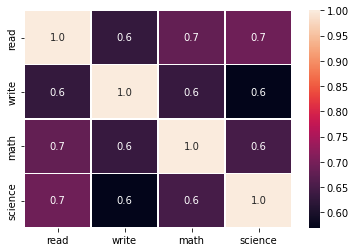

In [26]:
_ = sns.heatmap(acad.corr(),annot= True,linewidths=0.5,fmt = ".1f")

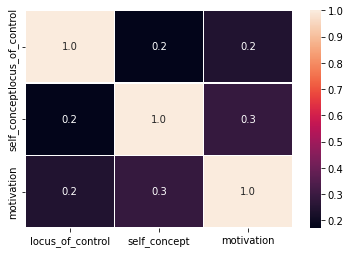

In [27]:
_ = sns.heatmap(psych.corr(), annot= True, linewidths=0.5,fmt = ".1f")

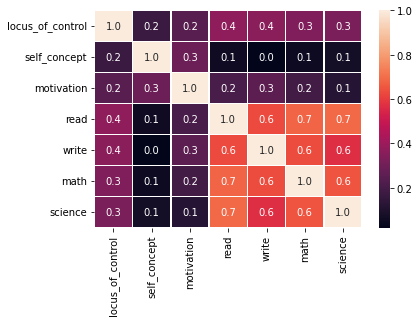

In [28]:
_ = sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f")

### Рассмотрим различные виды корреляций и их p-value:

In [29]:
for i in range(3):
    for j in range(3,7):
        print(data.columns[i], data.columns[j], st.pearsonr(data.loc[:, data.columns[i]], data.loc[:, data.columns[j]]))

for i in range(3):
    for j in range(3,7):
        print(data.columns[i], data.columns[j], tuple(st.spearmanr(data.loc[:, data.columns[i]], data.loc[:, data.columns[j]])))
        

for i in range(3):
    for j in range(3,7):
        print(data.columns[i], data.columns[j], tuple(st.kendalltau(data.loc[:, data.columns[i]], data.loc[:, data.columns[j]])))
        

locus_of_control read (0.37356504947514746, 2.627397942780776e-21)
locus_of_control write (0.3588768420819804, 1.1221310828193684e-19)
locus_of_control math (0.3372689906279467, 1.991716189030117e-17)
locus_of_control science (0.3246269370017945, 3.43272775288557e-16)
self_concept read (0.06065584275433424, 0.1378017616955153)
self_concept write (0.01944856136434241, 0.6344719269000973)
self_concept math (0.05359770276536924, 0.189832437244966)
self_concept science (0.06982633008189815, 0.08746792544962763)
motivation read (0.21060992276201443, 1.923105143899276e-07)
motivation write (0.25424817594744153, 2.633931797328235e-10)
motivation math (0.19501347444887498, 1.485623794378294e-06)
motivation science (0.11566947603763432, 0.004554941088249463)
locus_of_control read (0.3601422423341907, 8.182164140514947e-20)
locus_of_control write (0.3326876192140294, 5.674711505007227e-17)
locus_of_control math (0.3225522195783023, 5.408667273460768e-16)
locus_of_control science (0.3215329829066

## Образование и вера
**2008 General Social Survey, National Opinion Research center (Agresti A. Categorical Data Analysis. — Hoboken: John Wiley & Sons, 2013, табл. 3.2)**

General Social Survey — ежегодный опрос населения США, записывается около 5000 факторов. Из опроса 2008 года выбраны данные о вере и образовании 2000 опрошенных. Есть ли связь между степенью веры и уровнем образования?

In [30]:
data= pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/seminars/sem5/data/fe.txt', delimiter='\t')

In [31]:
data.head()

,Highest degree,don’t believe,no way to find out,some higher power,believe sometimes,believe but doubts,know God exists
0,Less than high school,9,8,27,8,47,236
1,High school or junior college,23,39,88,49,179,706
2,Bachelor or graduate,28,48,89,19,104,293


### Pearson $\chi^2$

In [32]:
values = data.values[:, 1:].astype(np.float)
values

array([[  9.,   8.,  27.,   8.,  47., 236.],
       [ 23.,  39.,  88.,  49., 179., 706.],
       [ 28.,  48.,  89.,  19., 104., 293.]])

In [33]:
st.chi2_contingency(values)

(76.1483261658133,
 2.842572791195739e-12,
 10,
 array([[ 10.05  ,  15.9125,  34.17  ,  12.73  ,  55.275 , 206.8625],
        [ 32.52  ,  51.49  , 110.568 ,  41.192 , 178.86  , 669.37  ],
        [ 17.43  ,  27.5975,  59.262 ,  22.078 ,  95.865 , 358.7675]]))

### G-test

In [34]:
st.chi2_contingency(values, lambda_ = "log-likelihood")

(73.18790888970611,
 1.0705703476205307e-11,
 10,
 array([[ 10.05  ,  15.9125,  34.17  ,  12.73  ,  55.275 , 206.8625],
        [ 32.52  ,  51.49  , 110.568 ,  41.192 , 178.86  , 669.37  ],
        [ 17.43  ,  27.5975,  59.262 ,  22.078 ,  95.865 , 358.7675]]))

### Коэффициент V Крамера

In [35]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r,k = confusion_matrix.shape
    return np.sqrt(chi2/(n*min(r, k,)-1))

In [36]:
stat = cramers_corrected_stat(values)
stat

0.11266544846660805

### Корреляция между порядковыми переенными

In [37]:
n = 0
pc = 0
pd = 0
pt = 0
for i in range(3):
    for j in range(6):
        for k in range(3):
            for z in range(6):
                current = values[i, j]*values[k, z]
                n+=current
                if i==k or j == z:
                    pt += current
                elif i>k and j>z:
                    pc += current
                else:
                    pd += current
gamma = (pc-pd)/(pc+pd+pt)
print(gamma)

-0.21698


### Встречаемость через длину

In [38]:
new_data = []
for i in range(values.shape[0]):
    for j in range(values.shape[1]):
        new_data.extend([[i,j]]*int(values[i,j]))
new_data = np.array(new_data)
new_data.shape

(2000, 2)

In [39]:
st.pearsonr(new_data[:,0], new_data[:, 1])[0]

-0.16203759162368098

In [40]:
st.kendalltau(new_data[:,0], new_data[:,1])[0]

-0.1475371344671059

In [41]:
st.spearmanr(new_data[:,0], new_data[:,1])[0]

-0.16436204271249027

In [42]:
data.values

array([['Less than high school', 9, 8, 27, 8, 47, 236],
       ['High school or junior college', 23, 39, 88, 49, 179, 706],
       ['Bachelor or graduate', 28, 48, 89, 19, 104, 293]], dtype=object)

### Через statmodels

In [43]:
table = sm.stats.Table(data.values[:, 1:])

In [44]:
table.table_orig

array([[9, 8, 27, 8, 47, 236],
       [23, 39, 88, 49, 179, 706],
       [28, 48, 89, 19, 104, 293]], dtype=object)

In [45]:
chi2_test = table.test_nominal_association()

In [46]:
chi2_test.statistic

76.14832616581332

In [47]:
chi2_test.pvalue

2.842615032250251e-12

### Корреляция Мэтьюся
$$MCC = \frac{ad-bc}{\sqrt{(a+b)(a+c)(b+d)(c+d)}}$$

In [48]:
for i in range(1, 3):
    print('#'*30)
    print (data.values[i, 0])
    for j in range(1, 6):
        a = values[i:, j:].sum()
        b = values[i:, :j].sum()
        c = values[:i, j:].sum()
        d = values[:i, :j].sum()
        C = (a*d - b*c)/((a+b)*(a+c)*(b+c)*(c+d))**0.5

        
        print('{}: {}'.format(data.columns[j+1], C))



##############################
High school or junior college
no way to find out: -0.0032878972142129214
some higher power: -0.026166704823330604
believe sometimes: -0.04332230388469834
believe but doubts: -0.05472333256702768
know God exists: -0.07392920094188866
##############################
Bachelor or graduate
no way to find out: -0.014052274802607664
some higher power: -0.042208233986054826
believe sometimes: -0.08854271827202974
believe but doubts: -0.08727154689593274
know God exists: -0.11753738675740537


## IE vs Murders Rate

**Disclaimer: пример выдуман, данных нет. Для наглядности.**

### Вариант 1
Пусть число убийств и процент пользователей Internet Explorer линейно зависят от года:

In [49]:
rs = np.random.RandomState(0)
years = np.arange(2006, 2012)
ie_users = -0.075 *  years + 151.25 + rs.uniform(size=years.shape[0])*0.1
ie_users


array([0.85488135, 0.79651894, 0.71027634, 0.62948832, 0.54236548,
       0.48958941])

In [50]:
rs = np.random.RandomState(0)
murder_num = -0.075 *  years + 151. + rs.uniform(size=years.shape[0])*0.1
murder_num

array([0.60488135, 0.54651894, 0.46027634, 0.37948832, 0.29236548,
       0.23958941])

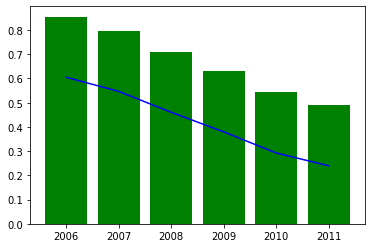

In [51]:
plt.bar(years, ie_users, color='g')
plt.plot(years, murder_num, c='b')

plt.show()

In [52]:
r12 = st.pearsonr(ie_users, murder_num)[0]
r13 = st.pearsonr(ie_users, years)[0]
r23 = st.pearsonr(murder_num, years)[0]

r12, r13, r23

(0.9999999999999999, -0.9977033457324236, -0.9977033457324236)

#### Условная корреляция
$$r_{1,2|3} = \frac{r_{1, 2} - r_{1, 3}*r_{2, 3}}{\sqrt[]{(1-r_{1, 3}^2)(1-r_{2, 3}^2)}}$$


In [53]:
(r12-r13*r23)/np.sqrt((1-r13**2)*(1-r23**2))

0.9999999999999758

### Вариант 2
Оба показателя линейно зависят от числа компьютеров в мире.
Число компьютеров зависит от года.

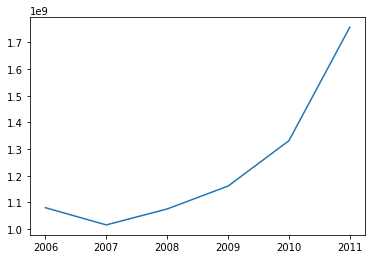

In [54]:
rs = np.random.RandomState(0)
comp_num = 10**9+np.exp(years-2006)*0.5*10**7 + rs.randint(low=0, high=10**8, size=years.shape[0])

plt.plot(years, comp_num)
plt.show()

In [55]:
rs = np.random.RandomState(0)
ie_users =   -0.6/10**9 *  comp_num+1.4 + rs.uniform(size=years.shape[0])*0.1
ie_users 


array([0.80662055, 0.86203503, 0.81488189, 0.75764987, 0.6434386 ,
       0.41032603])

In [56]:
rs = np.random.RandomState(0)
murder_num =  -0.6/10**9 *  comp_num+1.15 + rs.uniform(size=years.shape[0])*0.1
murder_num

array([0.55662055, 0.61203503, 0.56488189, 0.50764987, 0.3934386 ,
       0.16032603])

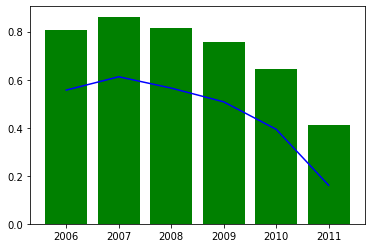

In [57]:
plt.bar(years, ie_users, color='g')
plt.plot(years, murder_num, c='b')

plt.show()

In [58]:
st.pearsonr(years, ie_users)[0], st.pearsonr(comp_num, ie_users)[0], 

(-0.861487246095062, -0.9982211910256553)

In [59]:
st.spearmanr(years, ie_users)[0], st.spearmanr(comp_num, ie_users)[0]

(-0.8285714285714287, -1.0)

In [60]:
r12 = st.pearsonr(ie_users, murder_num)[0]
r13 = st.pearsonr(murder_num, comp_num)[0]
r23 = st.pearsonr(ie_users, comp_num)[0]

r12, r13, r23

(1.0, -0.9982211910256553, -0.9982211910256553)

#### Условная корреляция
$$r_{1,2|3} = \frac{r_{1, 2} - r_{1, 3}*r_{2, 3}}{\sqrt[]{(1-r_{1, 3}^2)(1-r_{2, 3}^2)}}$$

In [61]:
(r12-r13*r23)/np.sqrt((1-r13**2)*(1-r23**2))

1.0

### Вариант 3
Пусть процент убийств снижается с процентом взрослого населения в стране.
Доля IE возрастает.


In [62]:
rs = np.random.RandomState(0)
adult = np.array([32,35,  38, 38, 39, 39])
murder_num = -0.6/10**9 *  comp_num + 0.3 + rs.uniform(size=years.shape[0])*0.1 + adult/40
murder_num


array([0.50662055, 0.63703503, 0.66488189, 0.60764987, 0.5184386 ,
       0.28532603])

In [63]:
rs = np.random.RandomState(0)
ie_users =  -0.6/10**9 *  comp_num+2.2 + rs.uniform(size=years.shape[0])*0.1 - adult/40
ie_users 


array([0.80662055, 0.78703503, 0.66488189, 0.60764987, 0.4684386 ,
       0.23532603])

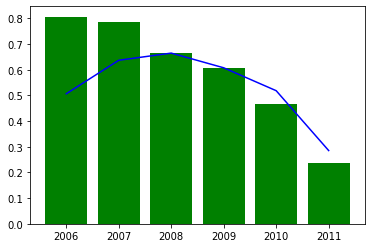

In [64]:
plt.bar(years, ie_users, color='g')
plt.plot(years, murder_num, c='b')

plt.show()

In [65]:
r12 = st.pearsonr(ie_users, murder_num)[0]
r13 = st.pearsonr(murder_num, comp_num)[0]
r23 = st.pearsonr(ie_users, comp_num)[0]

r12, r13, r23

(0.7738271741358052, -0.916089942643887, -0.9601569943820956)

#### Условная корреляция
$$r_{1,2|3} = \frac{r_{1, 2} - r_{1, 3}*r_{2, 3}}{\sqrt[]{(1-r_{1, 3}^2)(1-r_{2, 3}^2)}}$$

In [66]:
(r12-r13*r23)/np.sqrt((1-r13**2)*(1-r23**2))

-0.9438376514862333

In [67]:
r14 = st.pearsonr(murder_num, adult)[0]
r24 = st.pearsonr(ie_users, adult)[0]

r14, r24

(-0.2022666855201769, -0.7768242481877352)

#### Условная корреляция
$$r_{1,2|4} = \frac{r_{1, 2} - r_{1, 4}*r_{2, 3}}{\sqrt[]{(1-r_{1, 4}^2)(1-r_{2, 4}^2)}}$$

In [68]:
(r12-r14*r24)/np.sqrt((1-r14**2)*(1-r24**2))

0.9999999999999994

#### Условная корреляция через матрицу
$$r_{i,j}|other= \frac{r_{i,j}}{r_{ii}, r_{jj}}$$

##### Pearson

In [69]:
matrix = np.zeros((4,4))
datasets = [ie_users, murder_num, comp_num, adult]
for i in range(4):
    for j in range(i,4):
        matrix[i,j] = matrix[j,i] = st.pearsonr(datasets[i], datasets[j])[0]
matrix

array([[ 1.        ,  0.77382717, -0.96015699, -0.77682425],
       [ 0.77382717,  1.        , -0.91608994, -0.20226669],
       [-0.96015699, -0.91608994,  1.        ,  0.57378435],
       [-0.77682425, -0.20226669,  0.57378435,  1.        ]])

In [70]:
R = np.linalg.inv(matrix)
R

array([[ 2.15326055e+16, -1.38456406e+16,  6.35802772e+02,
         1.39265383e+16],
       [-1.38456406e+16,  8.90285953e+15, -1.64695486e+02,
        -8.95487743e+15],
       [ 1.83293975e+02,  1.26271352e+02,  2.92666908e+02,
         0.00000000e+00],
       [ 1.39265383e+16, -8.95487743e+15,  2.92666908e+02,
         9.00719925e+15]])

In [71]:
-R[1,0]/np.sqrt(R[0,0]*R[1,1])

1.0000000000000022

##### Kendal

In [72]:
matrix = np.zeros((4,4))
datasets = [ie_users, murder_num, comp_num, adult]
for i in range(4):
    for j in range(i,4):
        matrix[i,j] = matrix[j,i] = st.kendalltau(datasets[i], datasets[j])[0]
matrix

array([[ 1.        ,  0.33333333, -0.73333333, -0.93094934],
       [ 0.33333333,  1.        , -0.6       , -0.21483446],
       [-0.73333333, -0.6       ,  1.        ,  0.64450339],
       [-0.93094934, -0.21483446,  0.64450339,  1.        ]])

In [73]:
R = np.linalg.inv(matrix)
R

array([[ 9.84375000e+00, -4.68750000e-01,  1.87500000e+00,
         7.85488502e+00],
       [-4.68750000e-01,  1.71875000e+00,  1.25000000e+00,
        -8.72765003e-01],
       [ 1.87500000e+00,  1.25000000e+00,  3.12500000e+00,
        -2.81892565e-15],
       [ 7.85488502e+00, -8.72765003e-01,  0.00000000e+00,
         8.12500000e+00]])

In [74]:
-R[1,0]/np.sqrt(R[0,0]*R[1,1])

0.11396057645963856